## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
%matplotlib inline

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouseData = pd.read_csv(mouse_metadata)
studyResults = pd.read_csv(study_results)

In [2]:
mouseData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
studyResults.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
mouseResults = pd.merge(mouseData, studyResults, how = 'inner', on = 'Mouse ID')
mouseResults.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [5]:
#Check for null values
mouseResults.isnull().sum()

Mouse ID              0
Drug Regimen          0
Sex                   0
Age_months            0
Weight (g)            0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
dtype: int64

In [6]:
#Determine data types
mouseResults.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

## Summary statistics

In [7]:
# Generate a summary statistics of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
meanVol_Reg = mouseResults.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
medVol_Reg = mouseResults.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
varVol_Reg = mouseResults.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
stdVol_Reg = mouseResults.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
semVol_Reg = mouseResults.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

statsSumm_Reg = pd.DataFrame({'Mean': meanVol_Reg,
                              'Median': medVol_Reg,
                              'Variance': varVol_Reg,
                              'Std Dev': stdVol_Reg,
                              'SEM': semVol_Reg}).round(2)
statsSumm_Reg

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

In [8]:
dataPtCount_Reg = mouseResults['Drug Regimen'].value_counts()
dataPtCount_Reg

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

In [9]:
drugRegimensIndx = dataPtCount_Reg.index.values
drugRegimensIndx

array(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Stelasyn', 'Placebo', 'Ceftamin', 'Infubinol', 'Propriva'],
      dtype=object)

Text(0, 0.5, 'No. of Data Points')

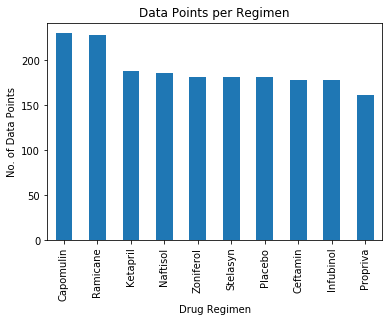

In [43]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
dataPtBar_Reg = dataPtCount_Reg.plot(kind='bar', title='Data Points per Regimen')

dataPtBar_Reg.set_xlabel('Drug Regimen')
dataPtBar_Reg.set_ylabel('No. of Data Points')

Text(0, 0.5, 'No. of Data Points')

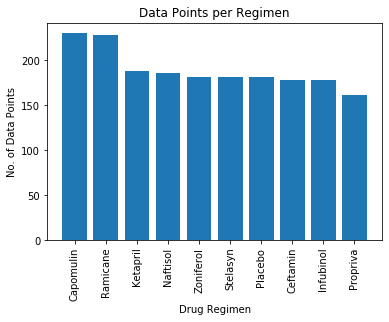

In [55]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
xaxis = np.arange(len(drugRegimensIndx))
plt.xticks(xaxis, drugRegimensIndx, rotation=90)

plt.bar(xaxis, dataPtCount_Reg)

plt.title('Data Points per Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('No. of Data Points')

## Pie plots

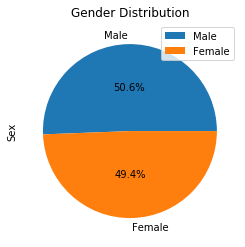

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genderCount = mouseResults['Sex'].value_counts() 
genderCount.plot(kind='pie', legend=True, autopct='%1.1f%%', pctdistance=.5, title='Gender Distribution')

([<matplotlib.patches.Wedge at 0x1674ee1a320>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')],
 [Text(-0.01145045643959205, 0.5998907292560246, '50.6%'),
  Text(0.011450456439592244, -0.5998907292560246, '49.4%')])

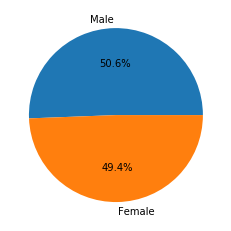

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = genderCount.index
plt.pie(genderCount, labels=labels, autopct="%1.1f%%")

plt.title('Gender Distribution')

## Quartiles, outliers and boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen